In [145]:
import pandas as pd
import webbrowser
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.externals import joblib
from datetime import datetime
from datetime import date

#Load the data set
df = pd.read_csv("data//steam_game_dataset.csv")

In [130]:
df.head(5)

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,,,English French German Italian Spanish,http://www.dayofdefeat.com/,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,0,...,,,English French German Korean,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,


In [131]:
df.shape

(12491, 78)

In [132]:
print(df.describe())

             QueryID     ResponseID   RequiredAge     DemoCount  \
count   12491.000000   12491.000000  12491.000000  12491.000000   
mean   348098.404531  347920.786566      0.871588      0.090065   
std    146978.096543  147075.099430      3.695496      0.286845   
min        10.000000      10.000000      0.000000      0.000000   
25%    277505.000000  277330.000000      0.000000      0.000000   
50%    368070.000000  367660.000000      0.000000      0.000000   
75%    459375.000000  459145.000000      0.000000      0.000000   
max    568150.000000  568150.000000     18.000000      2.000000   

       DeveloperCount      DLCCount    Metacritic    MovieCount  PackageCount  \
count    12491.000000  12491.000000  12491.000000  12491.000000  12491.000000   
mean         1.028901      0.850132     12.989993      1.328236      1.155472   
std          0.438953     10.368130     28.131277      1.198820      0.836137   
min          0.000000      0.000000      0.000000      0.000000      0.0

In [133]:
#Delete all rows where the game is free or the product is not a game
df = df.drop(df[df.IsFree == True].index)
df = df.drop(df[df.GenreIsNonGame == True].index)

#Delete all rows with 0 owners
df = df.drop(df[df.SteamSpyOwners == 0].index)

#Method for calculating age from date
def calculate_age(releaseDate):
    today = date.today()
    age = pd.to_datetime('today') - releaseDate
    return age.days

df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df['Age'] = df['ReleaseDate'].apply(calculate_age)
df = df.drop('ReleaseDate',1)

print(df.shape)

(9277, 78)


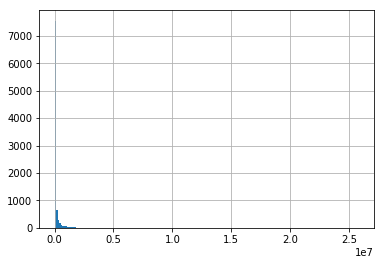

In [134]:
df['SteamSpyOwners'].hist(bins=200)
plt.show()

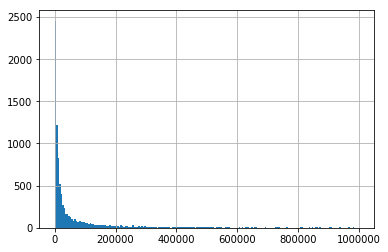

In [135]:
df['SteamSpyOwners'].hist(bins=200, range=(0,1000000))
plt.show()

In [136]:
#Delete all rows with outlier amount of sales (>1000000)
df = df.drop(df[df.SteamSpyOwners > 1000000].index)

print(df.shape)

(8947, 78)


In [137]:
#Select all columns with potentially useful features
df_features = pd.DataFrame(df,columns=['Age','RequiredAge','DemoCount',
                                      'DeveloperCount','Metacritic', 'MovieCount','PackageCount',
                                      'PublisherCount', 'ScreenshotCount', 'AchievementCount',
                                      'ControllerSupport', 'FreeVerAvail', 'SubscriptionAvail',
                                      'PlatformWindows', 'PlatformLinux', 'PlatformMac',
                                      'CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop',
                                      'CategoryMMO', 'CategoryInAppPurchase', 'CategoryVRSupport',
                                      'PriceInitial', 'DRMNotice'])

X = df_features.values
Y = df['SteamSpyOwners'].values

print(df_features.shape)
df_features.head(10)

(8947, 24)


,Age,RequiredAge,DemoCount,DeveloperCount,Metacritic,MovieCount,PackageCount,PublisherCount,ScreenshotCount,AchievementCount,...,PlatformLinux,PlatformMac,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryVRSupport,PriceInitial,DRMNotice
28,4978,0,1,1,69,1,1,1,5,0,...,False,False,True,True,False,False,False,False,9.99,False
29,4825,0,0,1,81,6,2,1,37,44,...,True,True,False,True,False,False,False,False,9.99,False
31,4768,0,0,1,75,1,1,1,5,0,...,False,False,True,False,False,False,False,False,9.99,False
32,4768,0,0,1,75,1,1,1,5,0,...,False,False,True,False,False,False,False,False,9.99,False
33,4768,0,0,1,75,1,1,1,5,0,...,False,False,True,False,False,False,False,False,9.99,False
34,5068,0,1,1,84,2,4,1,5,0,...,True,True,True,False,False,False,False,False,9.99,False
35,4663,0,0,1,75,1,2,1,4,0,...,True,True,True,False,False,False,False,False,9.99,False
36,4626,0,1,1,84,0,3,1,5,22,...,True,True,True,True,False,False,False,False,9.99,False
37,3905,0,1,1,76,7,3,1,16,12,...,False,True,True,True,False,False,False,False,9.99,False
38,4860,0,0,1,82,1,2,1,8,0,...,False,False,True,True,False,False,False,False,14.99,False


In [138]:
#Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

#Fit Regression model
model = ensemble.GradientBoostingRegressor(
    n_estimators=1000, #how many decision trees to build
    learning_rate=0.1, #how much decision trees influence overall prediction
    max_depth=6, #how many layers deep each individual decision tree can be
    min_samples_leaf=50, #how many times a value must appear in the training set for a decision tree to make a decision based on it
    max_features='sqrt', #percentage of features in our model that we randomly choose to consider each time we create a branch in our decision tree
    loss='huber', #how scikit-learn calculates the model’s error rate or cost as it learns
    random_state=7
)
model.fit(X_train, Y_train)

#Save the trained model to a file so we can use it in other programs
joblib.dump(model, 'models//trained_steam_sale_count_classifier.pk1')

['models//trained_steam_sale_count_classifier.pk1']

In [139]:
#Find the error rate on the training set
mse = mean_absolute_error(Y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

#Find the error rate on the test set
mse = mean_absolute_error(Y_test, model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

#Find the error rate on the training set
r2s = r2_score(Y_train, model.predict(X_train))
print("Training Set r2 score: %.4f" % r2s)

#Find the error rate on the test set
r2s = r2_score(Y_test, model.predict(X_test))
print("Test Set r2 score: %.4f" % r2s)

Training Set Mean Absolute Error: 40780.6543
Test Set Mean Absolute Error: 53758.2041
Training Set r2 score: 0.6088
Test Set r2 score: 0.4788


In [140]:
#Alternate dataset for rows with metacritic score
df = df.drop(df[df.Metacritic == 0].index)

df_features2 = pd.DataFrame(df,columns=['Age','RequiredAge','DemoCount',
                                      'DeveloperCount','Metacritic', 'MovieCount','PackageCount',
                                      'PublisherCount', 'ScreenshotCount', 'AchievementCount',
                                      'ControllerSupport', 'FreeVerAvail', 'SubscriptionAvail',
                                      'PlatformWindows', 'PlatformLinux', 'PlatformMac',
                                      'CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop',
                                      'CategoryMMO', 'CategoryInAppPurchase', 'CategoryVRSupport',
                                      'PriceInitial', 'DRMNotice'])

X2 = df_features2.values
Y2 = df['SteamSpyOwners'].values

print(df_features2.shape)
df_features2.head(10)

(1844, 24)


,Age,RequiredAge,DemoCount,DeveloperCount,Metacritic,MovieCount,PackageCount,PublisherCount,ScreenshotCount,AchievementCount,...,PlatformLinux,PlatformMac,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryVRSupport,PriceInitial,DRMNotice
28,4978,0,1,1,69,1,1,1,5,0,...,False,False,True,True,False,False,False,False,9.99,False
29,4825,0,0,1,81,6,2,1,37,44,...,True,True,False,True,False,False,False,False,9.99,False
31,4768,0,0,1,75,1,1,1,5,0,...,False,False,True,False,False,False,False,False,9.99,False
32,4768,0,0,1,75,1,1,1,5,0,...,False,False,True,False,False,False,False,False,9.99,False
33,4768,0,0,1,75,1,1,1,5,0,...,False,False,True,False,False,False,False,False,9.99,False
34,5068,0,1,1,84,2,4,1,5,0,...,True,True,True,False,False,False,False,False,9.99,False
35,4663,0,0,1,75,1,2,1,4,0,...,True,True,True,False,False,False,False,False,9.99,False
36,4626,0,1,1,84,0,3,1,5,22,...,True,True,True,True,False,False,False,False,9.99,False
37,3905,0,1,1,76,7,3,1,16,12,...,False,True,True,True,False,False,False,False,9.99,False
38,4860,0,0,1,82,1,2,1,8,0,...,False,False,True,True,False,False,False,False,14.99,False


In [141]:
#Split the data set in a training set (70%) and a test set (30%)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=7)

#Fit Regression model
model = ensemble.GradientBoostingRegressor(
    n_estimators=1000, #how many decision trees to build
    learning_rate=0.1, #how much decision trees influence overall prediction
    max_depth=6, #how many layers deep each individual decision tree can be
    min_samples_leaf=50, #how many times a value must appear in the training set for a decision tree to make a decision based on it
    max_features='sqrt', #percentage of features in our model that we randomly choose to consider each time we create a branch in our decision tree
    loss='huber', #how scikit-learn calculates the model’s error rate or cost as it learns
    random_state=7
)
model.fit(X_train2, Y_train2)

#Save the trained model to a file so we can use it in other programs
joblib.dump(model, 'models//trained_steam_sale_count_classifier2.pk1')

['models//trained_steam_sale_count_classifier2.pk1']

In [143]:
#Find the error rate on the training set
mse = mean_absolute_error(Y_train2, model.predict(X_train2))
print("Training Set Mean Absolute Error: %.4f" % mse)

#Find the error rate on the test set
mse = mean_absolute_error(Y_test2, model.predict(X_test2))
print("Test Set Mean Absolute Error: %.4f" % mse)

#Find the error rate on the training set
r2s = r2_score(Y_train2, model.predict(X_train2))
print("Training Set r2 score: %.4f" % r2s)

#Find the error rate on the test set
r2s = r2_score(Y_test2, model.predict(X_test2))
print("Test Set r2 score: %.4f" % r2s)

Training Set Mean Absolute Error: 67771.2323
Test Set Mean Absolute Error: 135789.2025
Training Set r2 score: 0.7764
Test Set r2 score: 0.2373


In [146]:
# These are the feature labels from our data set
feature_labels = np.array(['Age','RequiredAge','DemoCount',
                            'DeveloperCount','Metacritic', 'MovieCount','PackageCount',
                            'PublisherCount', 'ScreenshotCount', 'AchievementCount',
                            'ControllerSupport', 'FreeVerAvail', 'SubscriptionAvail',
                            'PlatformWindows', 'PlatformLinux', 'PlatformMac',
                            'CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop',
                            'CategoryMMO', 'CategoryInAppPurchase', 'CategoryVRSupport',
                            'PriceInitial', 'DRMNotice'])

# Load the trained model created with train_model.py
model = joblib.load('models//trained_steam_sale_count_classifier.pk1')

# Create a numpy array based on the model's feature importances
importance = model.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feature_indexes_by_importance = importance.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

FreeVerAvail - 0.00%
CategoryInAppPurchase - 0.00%
PlatformWindows - 0.00%
SubscriptionAvail - 0.00%
DRMNotice - 0.00%
CategoryMMO - 0.02%
CategoryVRSupport - 0.04%
CategorySinglePlayer - 0.10%
PublisherCount - 0.28%
DeveloperCount - 0.52%
DemoCount - 0.63%
CategoryCoop - 0.88%
CategoryMultiplayer - 1.19%
PlatformMac - 1.33%
PlatformLinux - 1.40%
ControllerSupport - 1.61%
RequiredAge - 3.60%
MovieCount - 3.87%
ScreenshotCount - 5.70%
AchievementCount - 7.81%
PriceInitial - 8.10%
PackageCount - 11.06%
Metacritic - 22.75%
Age - 29.11%
